In [1]:
!pip install imblearn
!pip install scikit-learn==1.1.0 --user
!pip install sklearn
!pip3 install xgboost
!pip install lightgbm

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=1675c24ee3c1ade6e9d1ae260bc846724e45f891f4e96d229720a692d3ec2960
  Stored in directory: c:\users\sahal\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
import pickle

### IMPORTING DATA FRAME

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/roni96007/ProjectsDatatrained/main/Practice_Projects/Project%203/winequality_red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Exploratory Data Analysis (EDA)

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.shape

(1599, 12)

In [11]:
df.shape[1]

12

In [12]:
df.shape[0]

1599

In [13]:


df.shape[1]



12

In [14]:


type(df.shape)



tuple

In [15]:


df.dtypes



fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
df.skew() # acceptable range is +/-0.5

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

## DATA VISUALIZATION

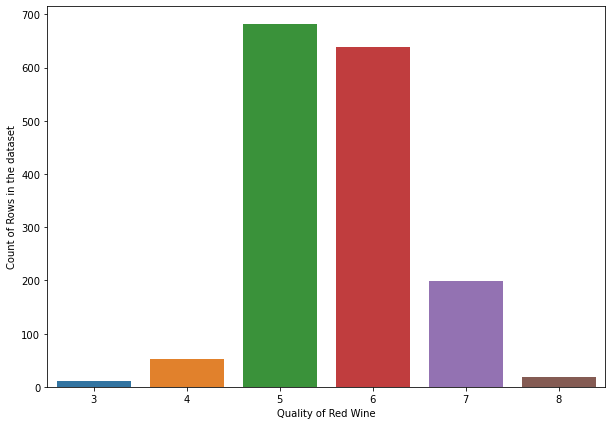

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

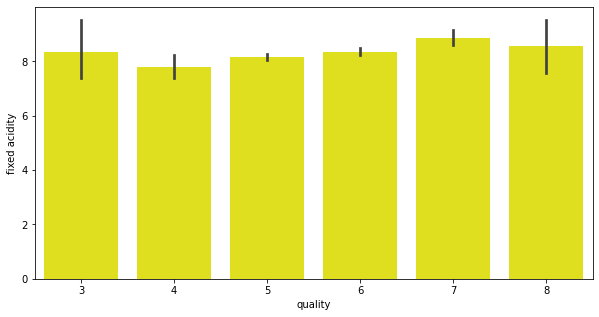

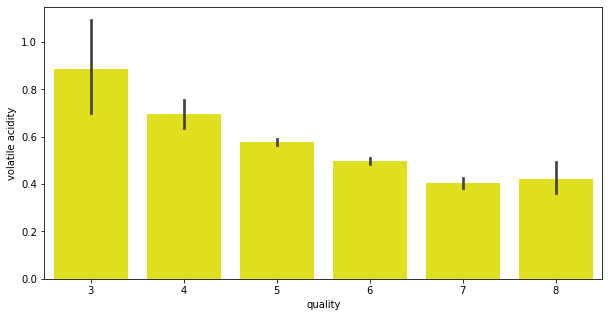

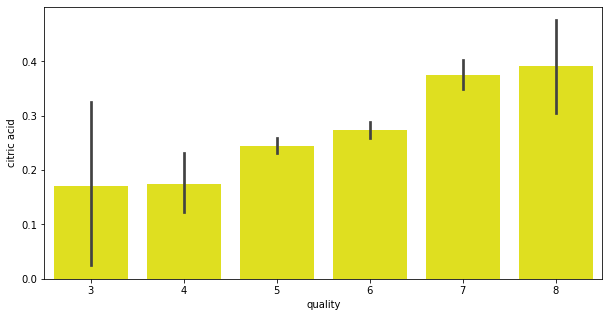

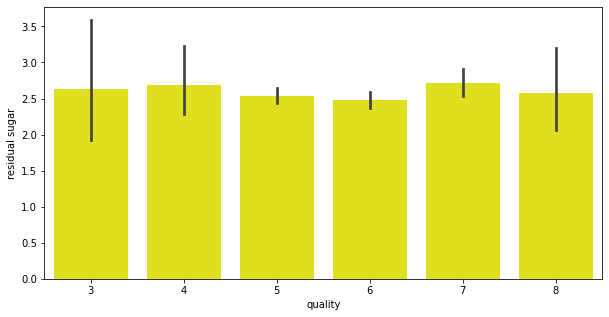

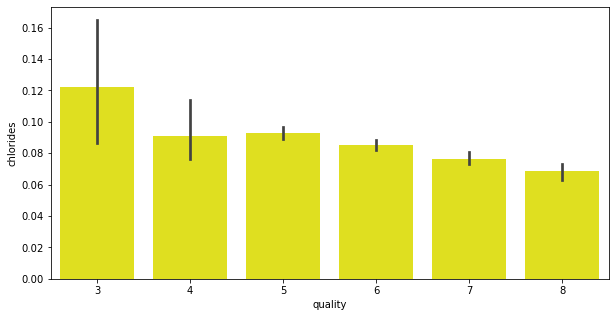

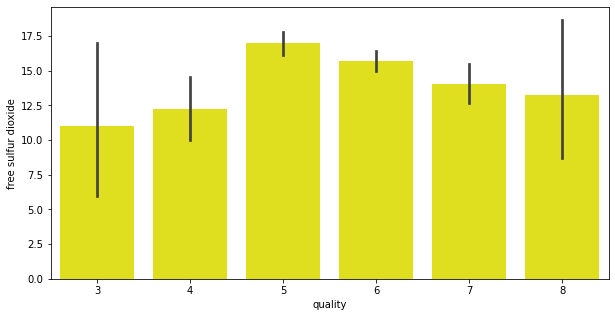

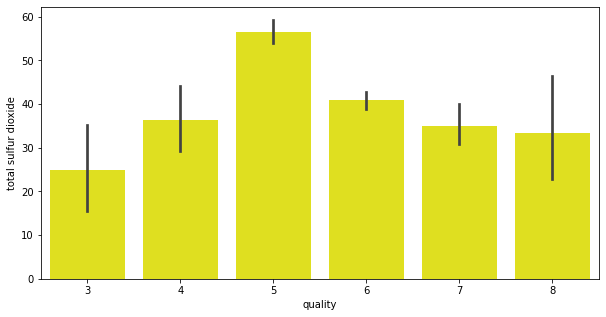

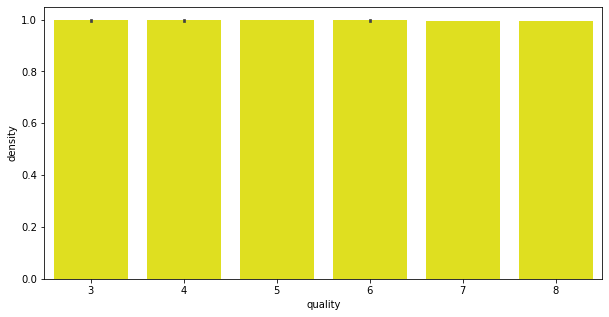

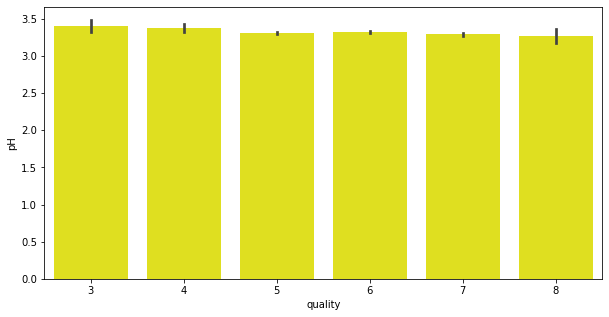

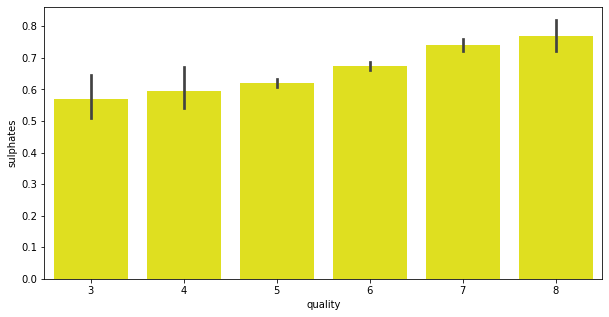

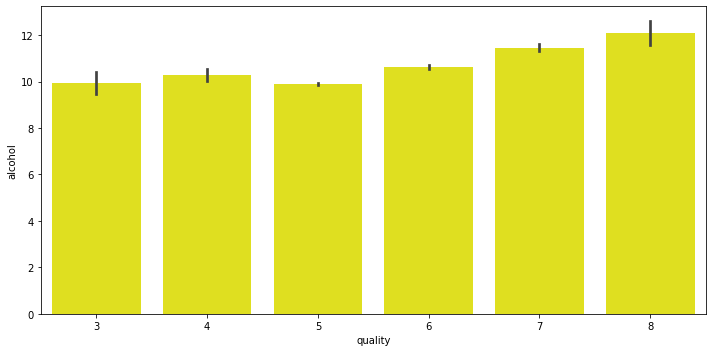

In [23]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="yellow")
plt.tight_layout()
plt.show()

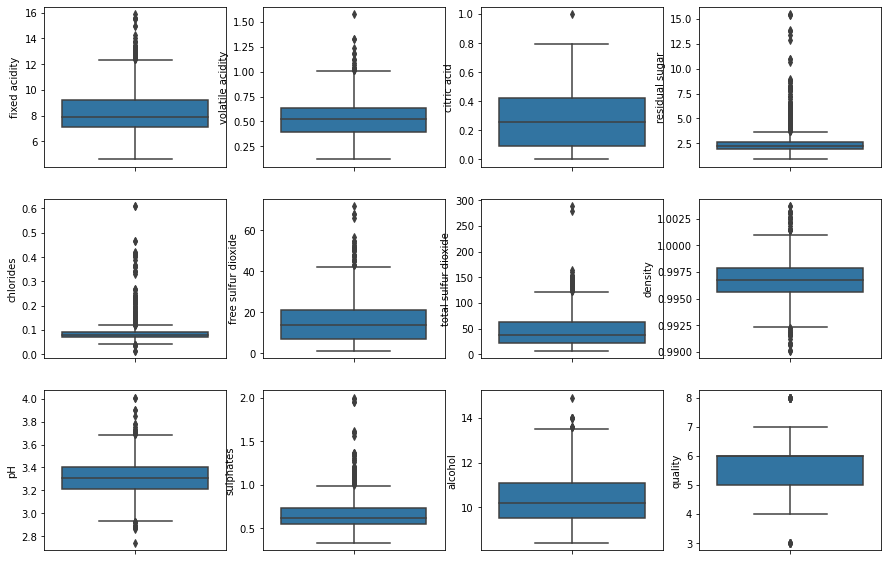

In [24]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.show()

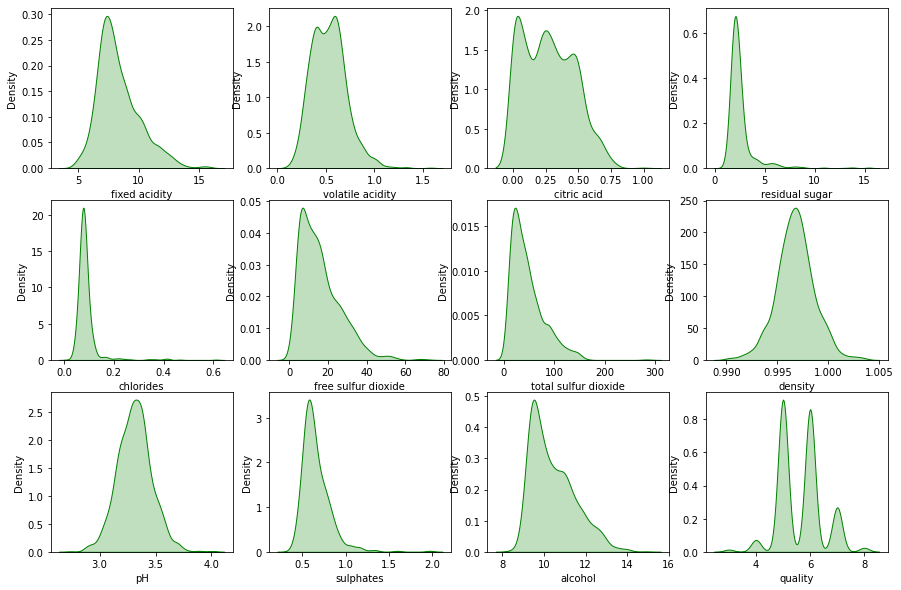

In [27]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="green", kde_kws={"shade": True})
    index += 1
plt.show()

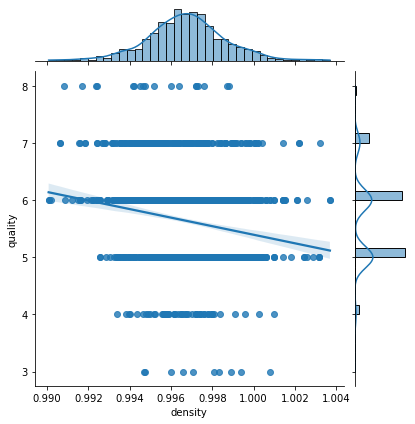

In [28]:
sns.jointplot('density', 'quality', data = df, kind="reg")
plt.show()


## Correlation using a Heatmap

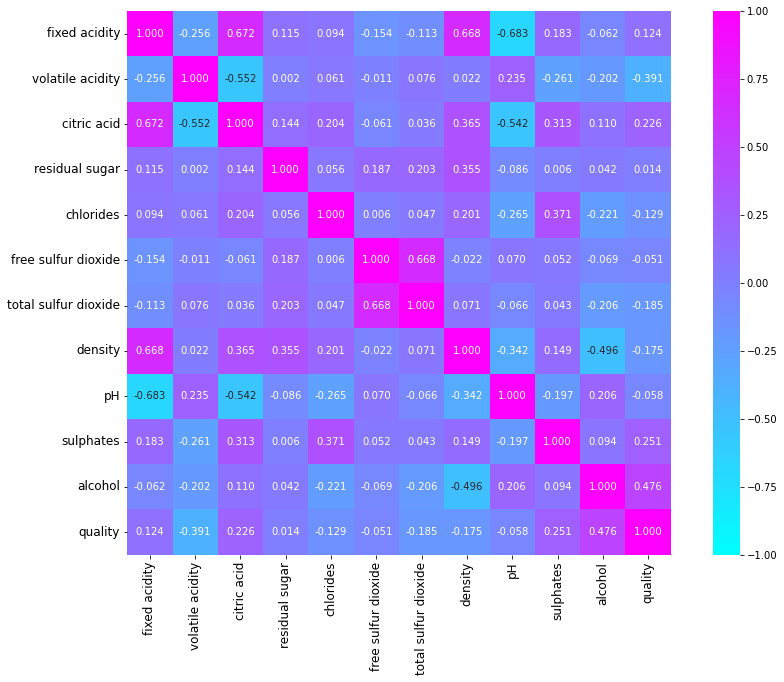

In [29]:
corrdef=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrdef, vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',annot_kws={'size':10},cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#### Dropping Columns

In [30]:
df = df.drop('total sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


#### Outlier removal

In [31]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [32]:


df.shape



(1460, 11)

## Splitting the dataset into 2 variables 'X' and 'Y'

In [33]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [34]:
Y.value_counts()

5    624
6    588
7    185
4     47
8     16
Name: quality, dtype: int64

In [35]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [36]:
Y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

In [37]:


Y # Display the label



0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64


### Label Binarization

In [38]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) 
Y

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [40]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,10.338739,0.362042,0.505916,2.462377,0.069656,5.172029,0.996849,3.184406,0.656881,11.120420
3116,10.405745,0.348319,0.513185,2.524335,0.069243,4.831854,0.997099,3.156726,0.687833,10.915927
3117,11.191870,0.571341,0.644770,4.731436,0.083117,5.819783,0.998512,3.207385,0.682791,12.967479
3118,10.603298,0.342747,0.510660,3.518666,0.070725,5.000000,0.997297,3.169340,0.691098,11.386807



## Feature Scaling

In [41]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,-0.647781,1.028093,-1.513786,-0.612260,-0.138392,-0.274825,0.840511,1.505315,-0.784021,-1.257357
1,-0.393870,2.043586,-1.513786,0.186148,1.094380,1.279816,0.244515,-0.778412,0.112220,-0.896885
2,-0.393870,1.366590,-1.304851,-0.156027,0.758169,0.169358,0.363714,-0.336400,-0.111841,-0.896885
3,1.764369,-1.341393,1.411304,-0.612260,-0.194427,0.391450,0.959710,-1.073087,-0.634648,-0.896885
4,-0.647781,1.028093,-1.513786,-0.612260,-0.138392,-0.274825,0.840511,1.505315,-0.784021,-1.257357
...,...,...,...,...,...,...,...,...,...,...
3115,1.217661,-0.878542,1.128802,0.029177,-0.493881,-0.921996,0.273755,-0.893293,-0.060448,0.293051
3116,1.260195,-0.955965,1.166774,0.099845,-0.517001,-0.959771,0.422785,-1.097207,0.170720,0.108766
3117,1.759208,0.302248,1.854087,2.617227,0.260384,-0.850066,1.264654,-0.724009,0.133067,1.957584
3118,1.385597,-0.987395,1.153581,1.233962,-0.433962,-0.941099,0.540547,-1.004278,0.195108,0.533113


## Creating the training and testing data sets

In [42]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)



## Machine Learning Model for Classification and Evaluation Metrics

In [43]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [44]:
model=LogisticRegression()
classify(model, X, Y) # Logistic Regression

Accuracy Score: 88.46153846153845

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       390
           1       0.83      0.86      0.85       234

    accuracy                           0.88       624
   macro avg       0.88      0.88      0.88       624
weighted avg       0.89      0.88      0.88       624

Cross Validation Score: 87.11538461538461

Accuracy Score - Cross Validation Score is 1.3461538461538396


In [45]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y) # Support Vector Classifier

Accuracy Score: 91.34615384615384

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       390
           1       0.88      0.89      0.89       234

    accuracy                           0.91       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 88.97435897435898

Accuracy Score - Cross Validation Score is 2.3717948717948616


In [46]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y) # Decision Tree Classifier

Accuracy Score: 90.06410256410257

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       390
           1       0.85      0.90      0.87       234

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 88.17307692307693

Accuracy Score - Cross Validation Score is 1.8910256410256352


In [47]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y) # Random Forest Classifier

Accuracy Score: 94.07051282051282

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       390
           1       0.90      0.95      0.92       234

    accuracy                           0.94       624
   macro avg       0.93      0.94      0.94       624
weighted avg       0.94      0.94      0.94       624

Cross Validation Score: 92.56410256410255

Accuracy Score - Cross Validation Score is 1.5064102564102626


In [48]:


model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y) # K Neighbors Classifier



Accuracy Score: 89.74358974358975

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       390
           1       0.83      0.91      0.87       234

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.89       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.43589743589745

Accuracy Score - Cross Validation Score is 2.3076923076923066


In [49]:
model=ExtraTreesClassifier()
classify(model, X, Y) # Extra Trees Classifier

Accuracy Score: 95.3525641025641

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       390
           1       0.92      0.96      0.94       234

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 93.49358974358975

Accuracy Score - Cross Validation Score is 1.8589743589743506


In [50]:
model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y) # XGB Classifier

Accuracy Score: 94.87179487179486

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       390
           1       0.91      0.96      0.93       234

    accuracy                           0.95       624
   macro avg       0.94      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 91.76282051282051

Accuracy Score - Cross Validation Score is 3.1089743589743506


In [51]:
model=lgb.LGBMClassifier()
classify(model, X, Y) # LGBM Classifier

Accuracy Score: 94.55128205128204

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       390
           1       0.91      0.94      0.93       234

    accuracy                           0.95       624
   macro avg       0.94      0.95      0.94       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 92.01923076923076

Accuracy Score - Cross Validation Score is 2.5320512820512846


## Hyper parameter tuning on the best ML Model

In [52]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [53]:


GSCV = GridSearchCV(SVC(), svc_param, cv=5)





I am using the Grid Search CV method for hyper parameter tuning my best model.


In [54]:


GSCV.fit(X_train,Y_train)



[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [55]:


GSCV.best_params_



{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [56]:
Trained_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Trained_Model.fit(X_train, Y_train)
fmod_pred = Trained_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 91.34615384615384


# AUC ROC Curve

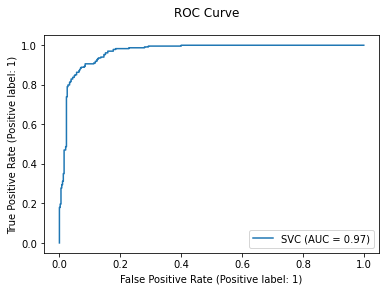

In [57]:
disp = metrics.plot_roc_curve(Trained_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()


## Confusion Matrix

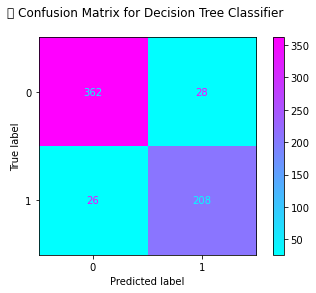

In [59]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='cool')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()


## Saving the model

In [60]:
filename = "Trained_Data.pkl"
pickle.dump(Trained_Model, open(filename,'wb'))